In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
!pip install --upgrade category_encoders

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)



In [ ]:
df.shape

(42515, 9)

### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile

### 2) 필요한 features를 확인한 후 ont-hot encoding을 수행하세요.(use category_encoders)

In [ ]:
X = df.drop(["Price"], axis=1)
y = df[["Price"]]

In [ ]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)

X = encoder.fit_transform(X);
print(df.shape);
print(X.shape);

(42515, 9)
(42515, 54)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### 3) 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### 4) feature selection을 수행하세요. (SelectKBest 사용, k = 20)

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=20)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)


X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


((34012, 20), (8503, 20))

In [ ]:
#선택된 특성들 확인
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Unselected names:  Index(['Type_t', 'Method_S', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'CouncilArea_Yarra City Council',
  

### 5) 선택한 features를 사용하여 best ridge regression model을 만드세요.
    - 다중 or 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


alphas = [0.01, 0.05, 0.1, 0.2, 0, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ridge.fit(ans[['x']], ans['y'])
print("alpha: ", ridge.alpha_)
# print("best score: ", ridge.best_score_)

alpha:  0.2


### 6) 테스트셋에 대한 MAE 값을 보고 모델이 잘 만들어 졌는지 확인해 보세요.

In [ ]:
def RidgeRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))

for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
        
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

Test MAE: $205,516
R2 Score: 0.6887

Test MAE: $205,403
R2 Score: 0.6863

Test MAE: $205,434
R2 Score: 0.6883

Test MAE: $207,142
R2 Score: 0.6777

Test MAE: $208,807
R2 Score: 0.6712

Test MAE: $209,801
R2 Score: 0.6673

Test MAE: $215,625
R2 Score: 0.6450

Test MAE: $223,657
R2 Score: 0.6186

Test MAE: $223,657
R2 Score: 0.6186

Test MAE: $258,545
R2 Score: 0.5168

Test MAE: $287,711
R2 Score: 0.4340

Test MAE: $392,026
R2 Score: 0.1110



### 7) feature 선택 수에 따른 MAE 값 변화를 확인해 보세요

1 features
Selected names:  Index(['Rooms'], dtype='object')
Test MAE: $371,330
Test R2: 0.18189125301009879 

2 features
Selected names:  Index(['Rooms', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $335,910
Test R2: 0.350065021361468 

3 features
Selected names:  Index(['Rooms', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $331,586
Test R2: 0.3597112898011232 

4 features
Selected names:  Index(['Rooms', 'Type_u', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $326,211
Test R2: 0.38789947833469274 

5 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $325,390
Test R2: 0.3948712579875602 

6 features


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $295,041
Test R2: 0.4797703724764566 

7 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $293,264
Test R2: 0.48250492023106384 

8 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')
Test MAE: $289,714
Test R2: 0.48906794090559835 

9 features


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered i

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')
Test MAE: $270,428
Test R2: 0.5312956909204107 

10 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council'],
      dtype='object')
Test MAE: $269,163
Test R2: 0.5335061796648861 

11 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Whittlesea City Council'],
      dtype='object')
Test MAE: $264,869
Test R2: 0.5492493609057053 

14 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Test MAE: $262,541
Test R2: 0.5536549220966973 

17 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilAr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Test MAE: $260,689
Test R2: 0.5577678308275796 

20 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
      

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Hume City Council', 'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Test MAE: $260,286
Test R2: 0.5590513227063877 

22 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropol

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Western Victoria',
       'Distance', 'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Test MAE: $258,647
Test R2: 0.5620276434291709 

25 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u',

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Western Victoria', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council'],
      dtype='object')
Test MAE: $258,850
Test R2: 0.5621834737977013 

27 features
Selected name

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $258,702
Test R2: 0.562669745408467 

29 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Western Victoria', 'Distance',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Casey City Council',
       'CouncilArea_Greater Dandenong City Council',
     

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Western Victoria', 'Distance',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Banyule City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council',
       'CouncilArea_Casey City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Wh

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $257,438
Test R2: 0.5684268581801207 

33 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Brimbank City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Banyule City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Counci

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $257,664
Test R2: 0.5690964311641598 

35 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Moreland City Council'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $257,372
Test R2: 0.5694068931037267 

37 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $256,273
Test R2: 0.5715459649292465 

39 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Maribyrnong City Council', 'CouncilArea_Hume City C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $255,303
Test R2: 0.5736967451584316 

41 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Maribyr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Maribyrnong City Council', 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Whitehorse City Council',
 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $254,267
Test R2: 0.5771744142299873 

46 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Whitehorse City Council',
 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_SP', 'Method_VB',
       'Method_PI', 'Method_SA', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Moonee Valley City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside City Council', 'CouncilArea_Banyule City Council',
       'CouncilArea_Glen Eira 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $253,945
Test R2: 0.5780481003922788 

52 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_S', 'Method_SP',
       'Method_VB', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Moonee Valley City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilAr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Selected names:  Index(['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Method_S', 'Method_SP',
       'Method_VB', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Southern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Western Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Yarra City Council',
       'CouncilArea_Moonee Valley City Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Darebin City Council',
       'CouncilArea_Hobsons Bay City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Monash City Council', 'CouncilArea_Kingston City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Bayside Cit

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Test MAE: $253,777
Test R2: 0.5784876715612615 



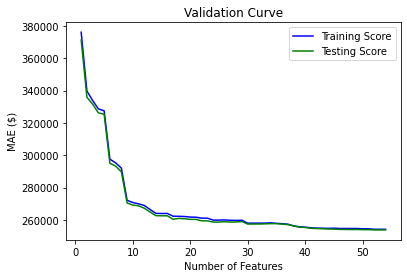

In [ ]:


training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

## 🔥 도전과제:

### 8) 만든 모델을 간략하게 정리해 설명하고, 테스트셋 성능 결과를 서로 공유하세요.

In [ ]:
def RidgeRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))

for alpha in [0.0001]:
        
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

Test MAE: $205,340
R2 Score: 0.6900



[DataScience] 과적합과 과소적합을 해결해주는 Ridge & Rasso (feat. nomalization)


저희가 분산 / 편향 트레이드오프를 이야기하면서

과적합과 과소적합에 대해서 알아보았습니다. 





일단 편향과 분산에 대해서 복습을 해보겠습니다. 





편향(Bias)는 모델이 너무 복잡해서 복잡한 곡선이

많다는 것은 편향이 높다라고 말할 수 있습니다. 





분산(variance)는 데이터 SET별로

모델이 얼마나 일관된 성능을 보이는를

나타냅니다. 



즉, 데이터별로 우리의 모델이 성능 차이가 낮다면

분산이 낮다라고 말할 수 있습니다. 



첫째, 과소적합은 어떻게 해결할까요?

간단히 생각하보면 과소적합이라는 말은

모델이 단순하다

선형적이다

라는 말로 대신할 수 있습니다. 

이러한 선형적인 모델은 차원을 높이면서

바로 해결할 수 있습니다.






둘째, 과적합은 어떻게 해결할까요?

과적합을 해결하는 방법이 

Ridge와 Lasso라고 하며 정규화한다라고 말합니다. 

오늘 저희가 배운 내용입니다.   



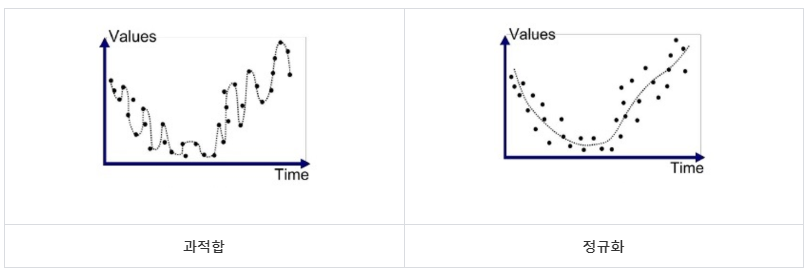

위 그림처럼 곡선의 폭을 줄이는 것을 쉽게 말하여 정규화라고 할 수 있습니다.   
  
릿지는 세터값을 1부터 마지막 세터까지 제곱한 총합과 람다를 곱하여 더해주게 된다.  
(라소는 제곱이 아니라 절대값의 총합만 다르다) 

우리는 왜 세터값의 총합을 람다에 곱해서 릿지를 하는지보단   
어떻게 활용하는지를 중점적으로 다루었다.  
feature를 몇개를 선택하는것이 적절한지  
람다는 어떤게 최적인지  
교재에 나와있는대로 했는데  
머가 뚝딱뚝딱 나와서 열심히 풀었다...

  여기에서는 r2의 최대값은 0.69이 나왔고   
  세터값은 0.0001로 설정하였다..